# Remarks
 - 강연에서 배운 딥러닝 용어들이 어떻게 코드에 있는지 확인해보기
 - Activation 함수, cost 함수, CNN 등

In [53]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt

num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [54]:
# 학습 및 테스트 데이터의 shape

print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


## 클래스가 10개인 Multi class classification

| Label | Description  | 
|:---:|:---:|
|  0 | T-shirt/top  | 
|  1 | Trouser  | 
|  2 | Pullover  |
|  3 | Dress  | 
|  4 | Coat  | 
|  5 | Sandal  | 
|  6 | Shirt  | 
|  7 | Sneake  | 
|  8 | Bag  | 
|  9 | Ankle boot  | 

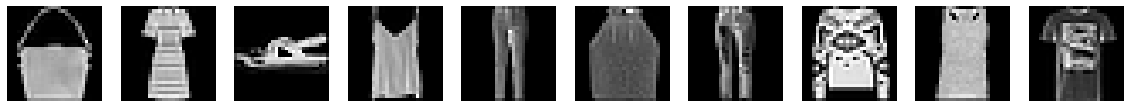

In [55]:
sample_size = 10

idx_s = np.random.randint(0,len(x_train), sample_size)
fig, ax = plt.subplots(1, sample_size, figsize=(sample_size*2, 2))

for i in range(sample_size):
    ax[i].set_axis_off()
    ax[i].imshow(np.reshape(x_train[idx_s][i], [28,28]),cmap="gray")

# 아래 모델을 본인이 수정하거나 새로운 레이어를 추가해서 더 높은 테스트 데이터 정확도 얻기!!

## Hint
 - 최적화 알고리즘의 끝판왕은?
 - 본인이 선호하는 activation 함수로 변경해보기
 - 새로운 hidden layer를 추가(선형함수가 아닌 activation)
 - Multi class 분류이기 때문에 마지막 layer의 activation은 무조건 **softmax**를 사용하여야 함!
 - 참고: [Dropout](https://mjgim.me/2018/01/02/overfitting.html)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])



In [0]:
# 관심있는 학생은 verbose, batch_size, validation_split이 무엇인지 찾아서 공부해보세요

In [57]:
batch_size = 256
epochs = 35

train_model=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/35
42000/42000 [==============================] - 3s 76us/step - loss: 0.8591 - acc: 0.6850 - val_loss: 0.4803 - val_acc: 0.8239
Epoch 2/35
42000/42000 [==============================] - 2s 50us/step - loss: 0.5115 - acc: 0.8150 - val_loss: 0.3898 - val_acc: 0.8579
Epoch 3/35
42000/42000 [==============================] - 2s 50us/step - loss: 0.4412 - acc: 0.8422 - val_loss: 0.3351 - val_acc: 0.8776
Epoch 4/35
42000/42000 [==============================] - 2s 49us/step - loss: 0.3944 - acc: 0.8578 - val_loss: 0.3181 - val_acc: 0.8826
Epoch 5/35
42000/42000 [==============================] - 2s 50us/step - loss: 0.3695 - acc: 0.8678 - val_loss: 0.2966 - val_acc: 0.8916
Epoch 6/35
42000/42000 [==============================] - 2s 50us/step - loss: 0.3513 - acc: 0.8742 - val_loss: 0.2987 - val_acc: 0.8890
Epoch 7/35
42000/42000 [==============================] - 2s 50us/step - loss: 0.3325 - acc: 0.8783 - val_loss: 0.2767 - val_acc

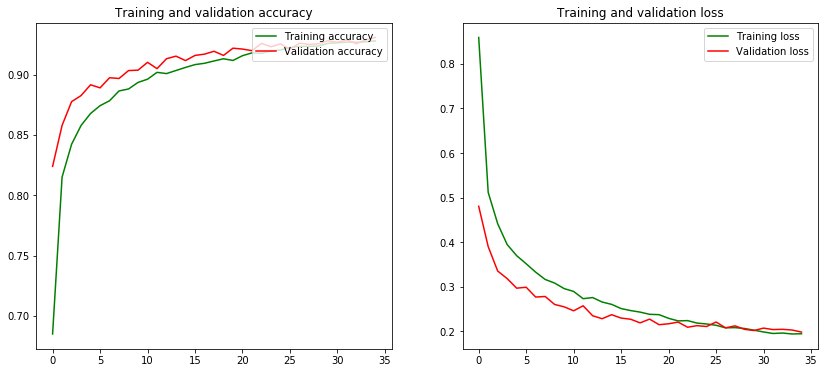

In [58]:
def plot_result(train_model):
    hist = train_model.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = range(len(acc))
    fig, ax = plt.subplots(1,2, figsize=(14,6))
    
    ax[0].plot(epochs, acc, 'g', label='Training accuracy')
    ax[0].plot(epochs, val_acc, 'r', label='Validation accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend(loc=1)
    ax[1].plot(epochs, loss, 'g', label='Training loss')
    ax[1].plot(epochs, val_loss, 'r', label='Validation loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend(loc=1)
    plt.show()
    
plot_result(train_model)

In [59]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21523219652175904
Test accuracy: 0.9249
